In [37]:
pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [39]:
from google.colab import files
files.upload()


Saving coin_Bitcoin.csv to coin_Bitcoin (1).csv


{'coin_Bitcoin.csv': b'SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap\n1,Bitcoin,BTC,2013-04-29 23:59:59,147.48800659179688,134.0,134.44400024414062,144.5399932861328,0.0,1603768864.5\n2,Bitcoin,BTC,2013-04-30 23:59:59,146.92999267578125,134.0500030517578,144.0,139.0,0.0,1542813125.0\n3,Bitcoin,BTC,2013-05-01 23:59:59,139.88999938964844,107.72000122070312,139.0,116.98999786376953,0.0,1298954593.75\n4,Bitcoin,BTC,2013-05-02 23:59:59,125.5999984741211,92.28189849853516,116.37999725341797,105.20999908447266,0.0,1168517495.25\n5,Bitcoin,BTC,2013-05-03 23:59:59,108.12799835205078,79.0999984741211,106.25,97.75,0.0,1085995168.75\n6,Bitcoin,BTC,2013-05-04 23:59:59,115.0,92.5,98.0999984741211,112.5,0.0,1250316562.5\n7,Bitcoin,BTC,2013-05-05 23:59:59,118.80000305175781,107.14299774169922,112.9000015258789,115.91000366210938,0.0,1288693175.5\n8,Bitcoin,BTC,2013-05-06 23:59:59,124.66300201416016,106.63999938964844,115.9800033569336,112.30000305175781,0.0,1249023060.0\n9,Bitcoin,BTC,2013

In [40]:
df = pd.read_csv('coin_Bitcoin.csv', parse_dates=['Date'])

In [41]:
df = df.sort_values('Date')

Data Exploration

In [42]:
df.head(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:59,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09
7,8,Bitcoin,BTC,2013-05-06 23:59:59,124.663002,106.639999,115.980003,112.300003,0.0,1.249023e+09
8,9,Bitcoin,BTC,2013-05-07 23:59:59,113.444000,97.699997,112.250000,111.500000,0.0,1.240594e+09
9,10,Bitcoin,BTC,2013-05-08 23:59:59,115.779999,109.599998,109.599998,113.566002,0.0,1.264049e+09


In [43]:
df.tail(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2981,2982,Bitcoin,BTC,2021-06-27 23:59:59,34656.127356,32071.757148,32287.523211,34649.644588,3.551164e+10,6.494617e+11
2982,2983,Bitcoin,BTC,2021-06-28 23:59:59,35219.891791,33902.075892,34679.122222,34434.335314,3.389252e+10,6.454428e+11
2983,2984,Bitcoin,BTC,2021-06-29 23:59:59,36542.111018,34252.484892,34475.559697,35867.777735,3.790146e+10,6.723334e+11
2984,2985,Bitcoin,BTC,2021-06-30 23:59:59,36074.759757,34086.151878,35908.388054,35040.837249,3.405904e+10,6.568525e+11
2985,2986,Bitcoin,BTC,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [44]:
df.shape

(2991, 10)

In [45]:
df.describe

<bound method NDFrame.describe of        SNo     Name Symbol                Date          High           Low  \
0        1  Bitcoin    BTC 2013-04-29 23:59:59    147.488007    134.000000   
1        2  Bitcoin    BTC 2013-04-30 23:59:59    146.929993    134.050003   
2        3  Bitcoin    BTC 2013-05-01 23:59:59    139.889999    107.720001   
3        4  Bitcoin    BTC 2013-05-02 23:59:59    125.599998     92.281898   
4        5  Bitcoin    BTC 2013-05-03 23:59:59    108.127998     79.099998   
...    ...      ...    ...                 ...           ...           ...   
2986  2987  Bitcoin    BTC 2021-07-02 23:59:59  33939.588699  32770.680780   
2987  2988  Bitcoin    BTC 2021-07-03 23:59:59  34909.259899  33402.696536   
2988  2989  Bitcoin    BTC 2021-07-04 23:59:59  35937.567147  34396.477458   
2989  2990  Bitcoin    BTC 2021-07-05 23:59:59  35284.344430  33213.661034   
2990  2991  Bitcoin    BTC 2021-07-06 23:59:59  35038.536363  33599.916169   

              Open         Cl

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2991 non-null   int64         
 1   Name       2991 non-null   object        
 2   Symbol     2991 non-null   object        
 3   Date       2991 non-null   datetime64[ns]
 4   High       2991 non-null   float64       
 5   Low        2991 non-null   float64       
 6   Open       2991 non-null   float64       
 7   Close      2991 non-null   float64       
 8   Volume     2991 non-null   float64       
 9   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 257.0+ KB


In [47]:
df.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [48]:
df.isna()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2986,False,False,False,False,False,False,False,False,False,False
2987,False,False,False,False,False,False,False,False,False,False
2988,False,False,False,False,False,False,False,False,False,False
2989,False,False,False,False,False,False,False,False,False,False


In [49]:
df.duplicated().sum()

0

In [50]:
df.value_counts()

SNo   Name     Symbol  Date                 High          Low           Open          Close         Volume        Marketcap   
1     Bitcoin  BTC     2013-04-29 23:59:59  147.488007    134.000000    134.444000    144.539993    0.000000e+00  1.603769e+09    1
1998  Bitcoin  BTC     2018-10-17 23:59:59  6601.210000   6517.450000   6590.520000   6544.430000   4.088420e+09  1.133993e+11    1
1989  Bitcoin  BTC     2018-10-08 23:59:59  6675.060000   6576.040000   6600.190000   6652.230000   3.979460e+09  1.151629e+11    1
1990  Bitcoin  BTC     2018-10-09 23:59:59  6661.410000   6606.940000   6653.080000   6642.640000   3.580810e+09  1.150078e+11    1
1991  Bitcoin  BTC     2018-10-10 23:59:59  6640.290000   6538.960000   6640.290000   6585.530000   3.787650e+09  1.140308e+11    1
                                                                                                                                 ..
1000  Bitcoin  BTC     2016-01-23 23:59:59  394.542999    381.980988    382.43399

In [51]:
df.max()

SNo                         2991
Name                     Bitcoin
Symbol                       BTC
Date         2021-07-06 23:59:59
High                64863.098908
Low                 62208.964366
Open                63523.754869
Close                63503.45793
Volume       350967941479.059998
Marketcap    1186364044140.27002
dtype: object

In [52]:
df.corr()

,SNo,High,Low,Open,Close,Volume,Marketcap
SNo,1.000000,0.667028,0.671538,0.668551,0.669008,0.718164,0.664713
High,0.667028,1.000000,0.998841,0.999442,0.999417,0.810464,0.999094
Low,0.671538,0.998841,1.000000,0.998905,0.999291,0.803110,0.999072
Open,0.668551,0.999442,0.998905,1.000000,0.998646,0.808439,0.998382
Close,0.669008,0.999417,0.999291,0.998646,1.000000,0.807388,0.999709
Volume,0.718164,0.810464,0.803110,0.808439,0.807388,1.000000,0.809156
Marketcap,0.664713,0.999094,0.999072,0.998382,0.999709,0.809156,1.000000


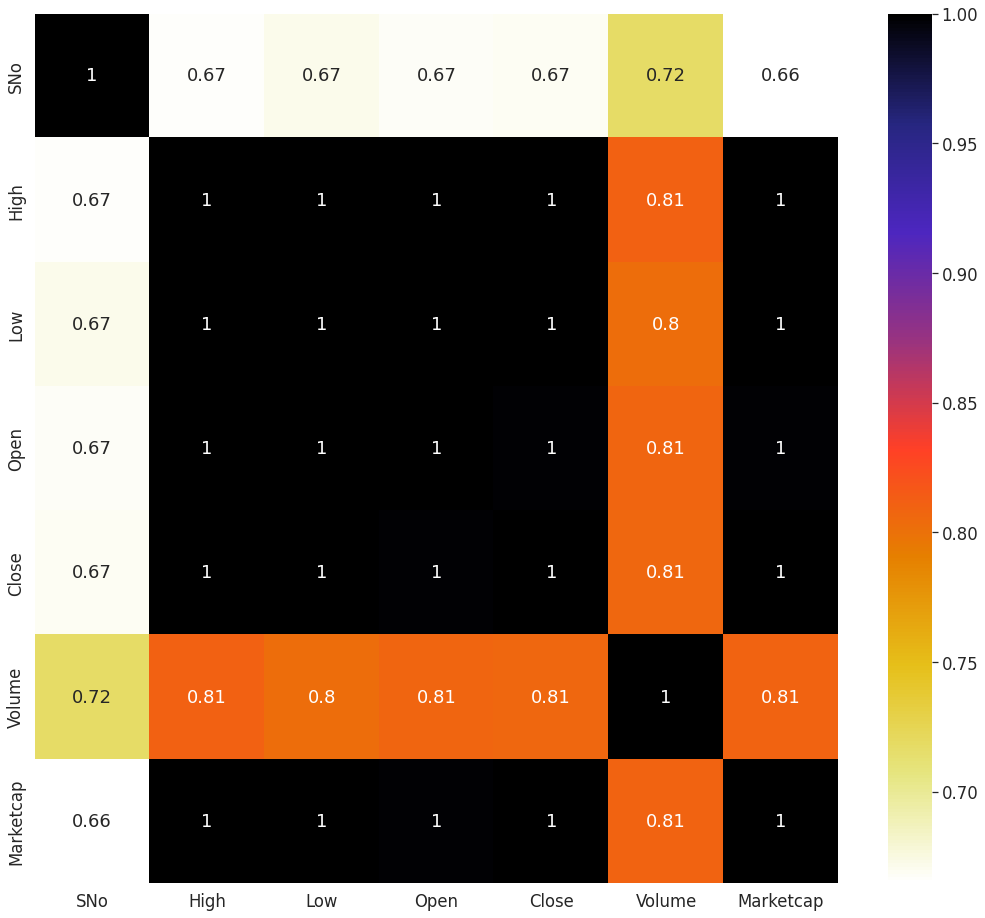

In [14]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r);

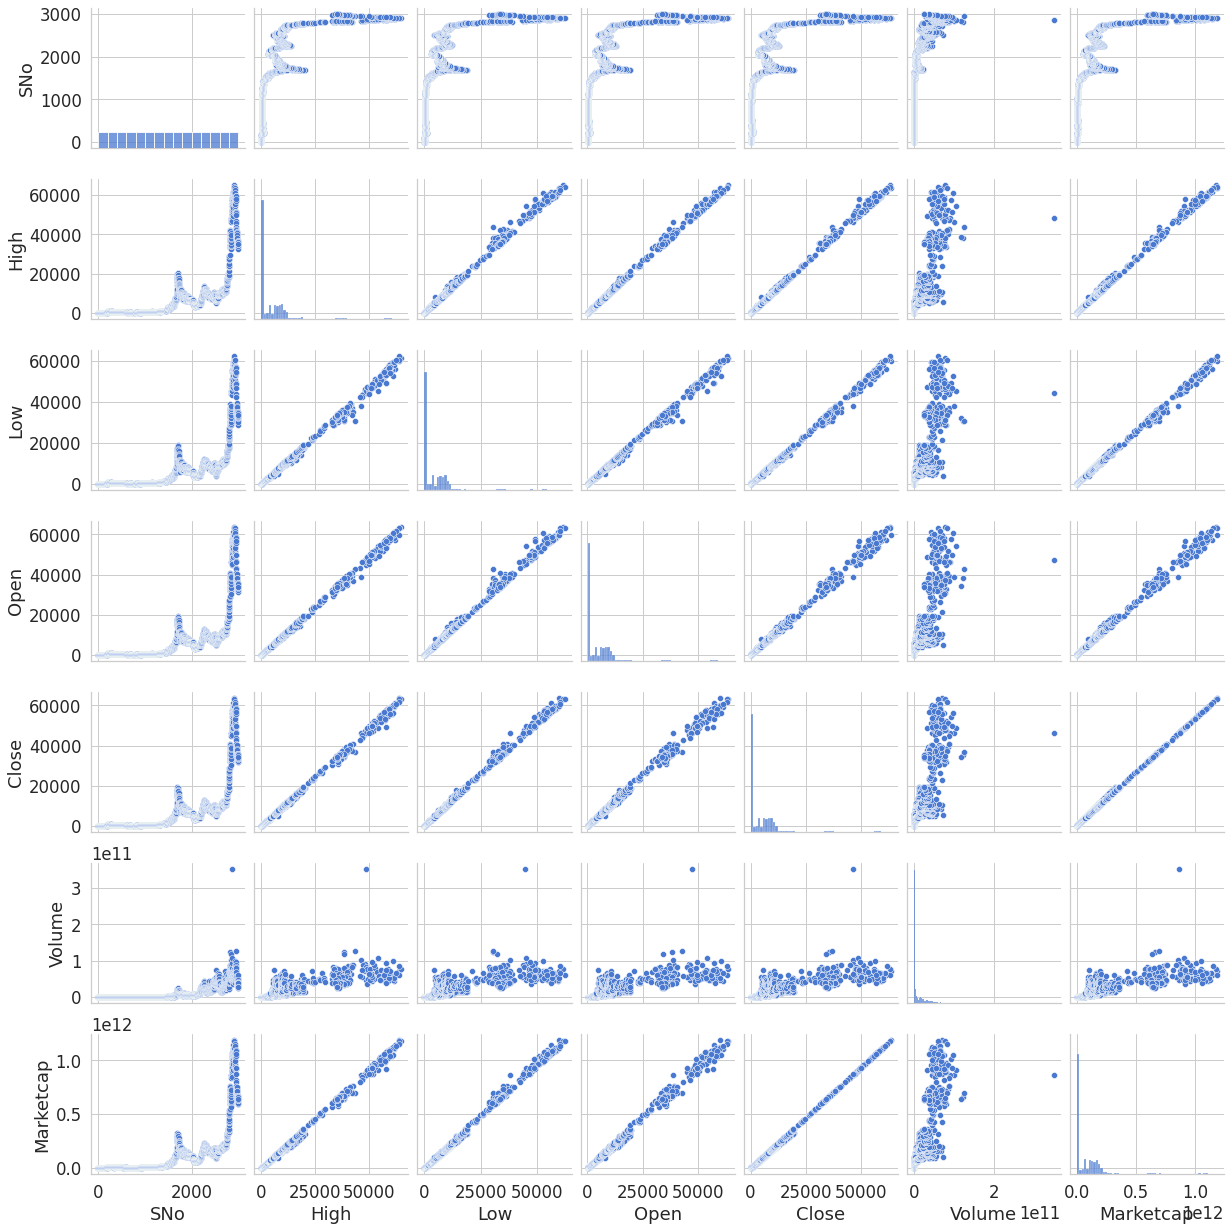

In [15]:
sns.pairplot(df)

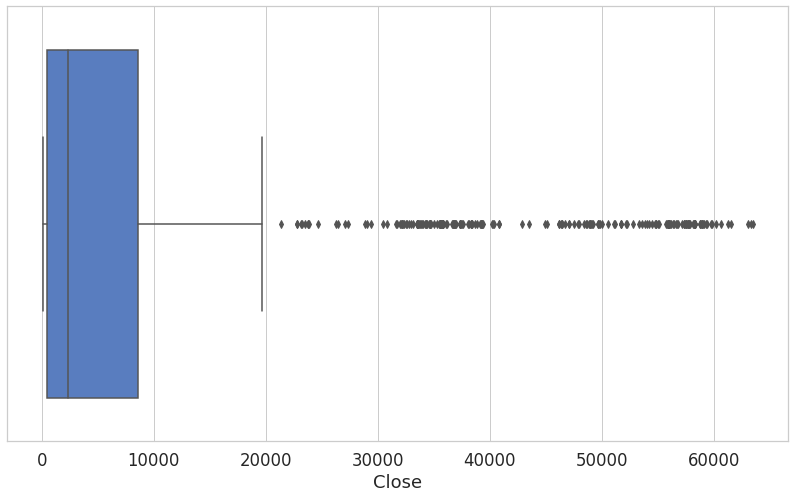

In [16]:
sns.boxplot(x=df["Close"])

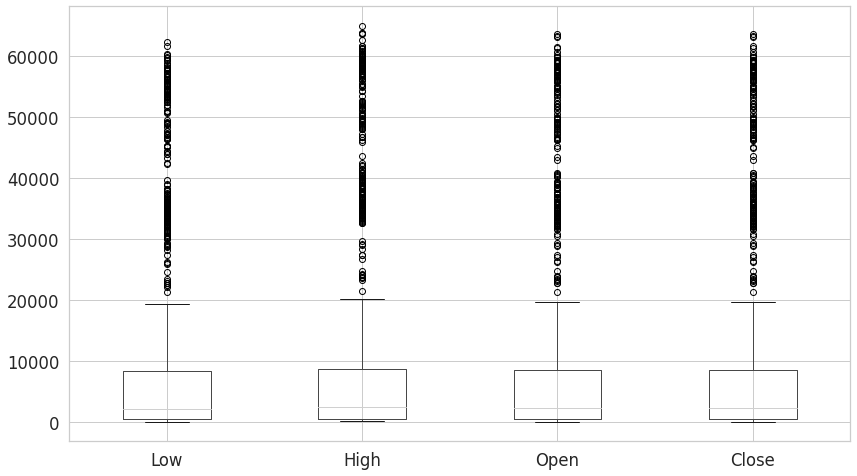

In [17]:
boxplot = df.boxplot(column=['Low','High','Open','Close'])

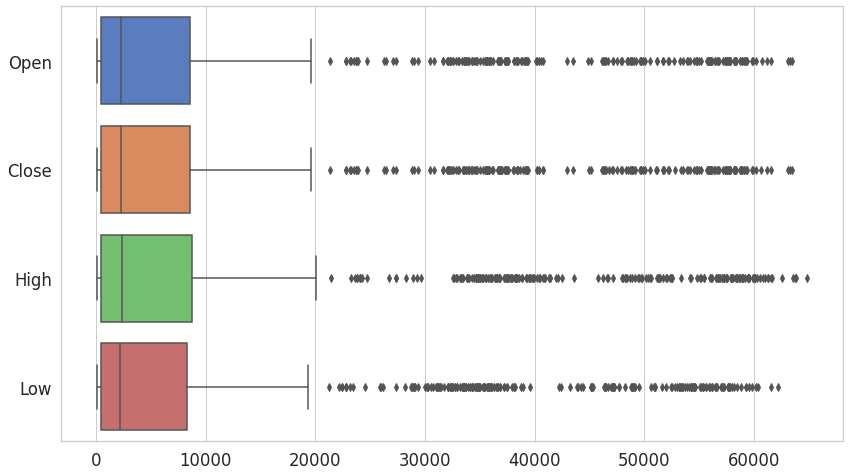

In [18]:
sns.boxplot(data=df[["Open", "Close" ,"High" ,"Low"]], orient="h")

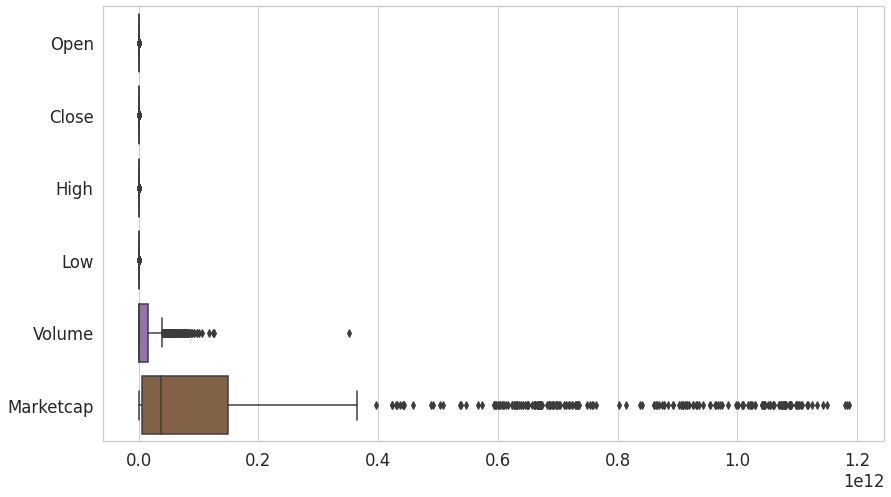

In [19]:
sns.boxplot(data=df[["Open", "Close" ,"High" ,"Low","Volume", "Marketcap"]], orient="h")

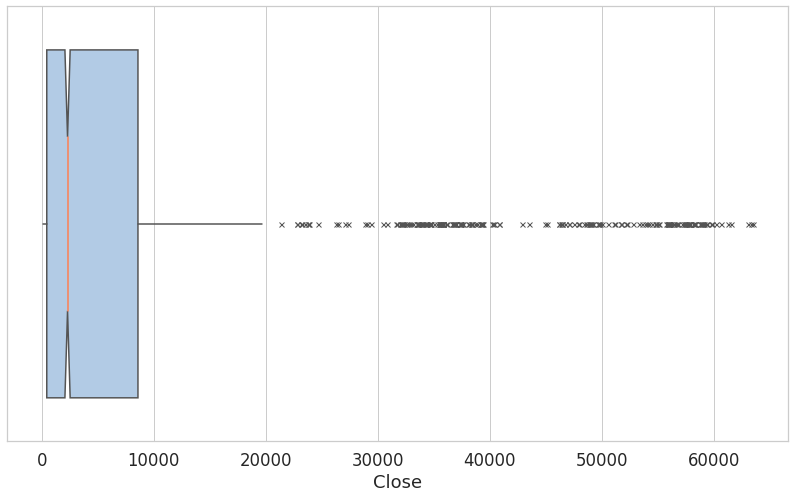

In [20]:
sns.boxplot(
    data=df, x="Close",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

Text(0, 0.5, 'Close Price (USD)')

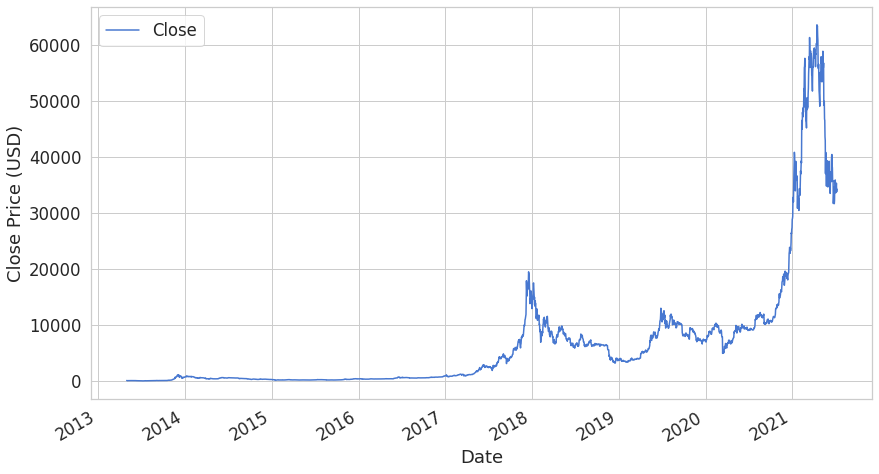

In [53]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

Data Normalization

In [54]:
scaler = MinMaxScaler()

close_price = df.Close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [55]:
scaled_close.shape

(2991, 1)

In [56]:
np.isnan(scaled_close).any()

False

In [57]:
scaled_close = scaled_close[~np.isnan(scaled_close)]

In [58]:
scaled_close = scaled_close.reshape(-1, 1)

In [59]:
np.isnan(scaled_close).any()

False

 Data preprocessing for training and testing/ Sequence building

LSTMs expect the data to be in 3 dimensions



In [60]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.80)



In [61]:
X_train.shape # training data 

(2312, 99, 1)

In [62]:
X_test.shape # testing data

(579, 99, 1)

Model building
creating a 3 layer LSTM Recurrent Neural Network

In [63]:
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from keras.models import Sequential
from keras.utils import Sequence
from keras.layers import CuDNNLSTM
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=False)))

model.add(Dense(units=1))

model.add(Activation('linear'))

Training the model 


In [64]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM #, CuDNNLSTM
BATCH_SIZE = 64

history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/20
33/33 [==============================] - 5s 65ms/step - loss: 0.0018 - val_loss: 0.0118
Epoch 2/20
33/33 [==============================] - 1s 42ms/step - loss: 0.0016 - val_loss: 0.0105
Epoch 3/20
33/33 [==============================] - 1s 42ms/step - loss: 0.0018 - val_loss: 0.0069
Epoch 4/20
33/33 [==============================] - 1s 42ms/step - loss: 0.0021 - val_loss: 0.0043
Epoch 5/20
33/33 [==============================] - 1s 42ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 6/20
33/33 [==============================] - 1s 43ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/20
33/33 [==============================] - 1s 45ms/step - loss: 0.0023 - val_loss: 7.4899e-04
Epoch 8/20
33/33 [==============================] - 1s 42ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 9/20
33/33 [==============================] - 1s 42ms/step - loss: 0.0023 - val_loss: 4.6023e-04
Epoch 10/20
33/33 [==============================] - 1s 43ms/step - loss: 0.0025 - val_loss: 4.1620e-

In [66]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 20ms/step - loss: 0.0034


0.003358157817274332

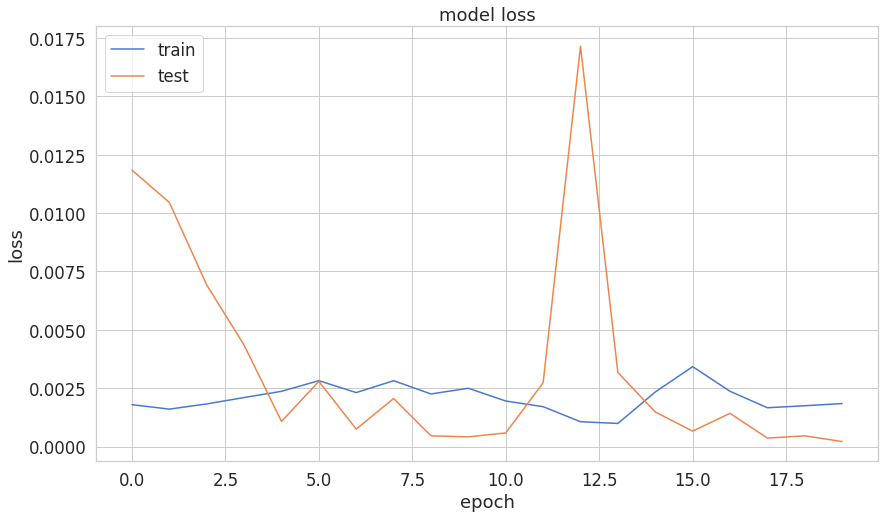

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Prediction 


19/19 [==============================] - 1s 23ms/step


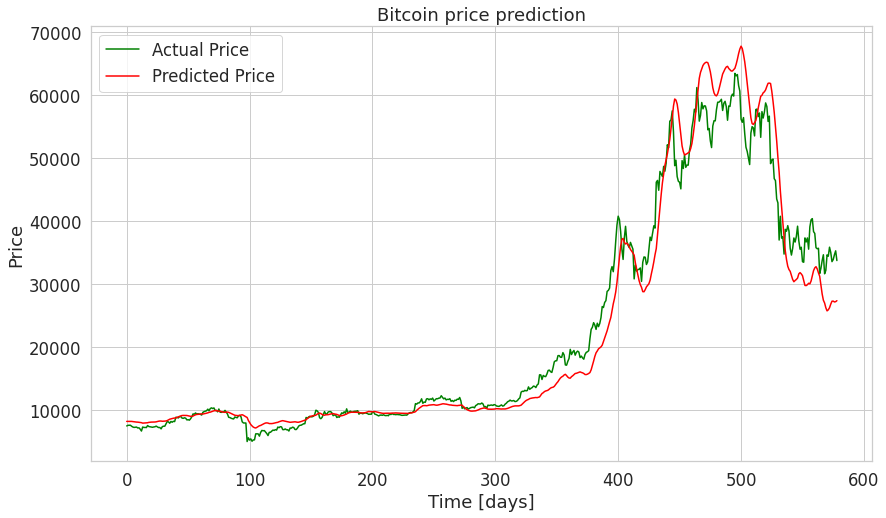

In [72]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();